In [1]:
import pandas as pd 
import numpy as np

In [43]:
df = pd.read_csv('NYC1000.csv')

In [44]:
df.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object')

In [45]:
df = df.drop(['id','alias','name','image_url','is_closed','url','coordinates','transactions','location',\
             'phone','display_phone','distance'],axis=1)

In [46]:
df.isnull().sum()

review_count     0
categories       0
rating           0
price           81
dtype: int64

In [47]:
df = df.dropna()

In [48]:
df.price.unique()

array(['$$', '$', '$$$', '$$$$'], dtype=object)

In [49]:
p={'$$':2, '$':1, '$$$':3, '$$$$':4}
df['price']=df['price'].map(p)

In [50]:
cat_lst = df['categories'].tolist()

In [51]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
lst=[]
for n in range(len(df)):
    tokens=tokenizer.tokenize(cat_lst[n])
    lst.append(tokens[1])
    
df=df.drop(['categories'],axis=1)
df['categories']=lst

In [52]:
df['is_closed']=0

In [53]:
df2=pd.read_csv('close_data.csv')

In [54]:
df2.columns

Index(['Unnamed: 0', 'id', 'alias', 'name', 'image_url', 'is_claimed',
       'is_closed', 'url', 'phone', 'display_phone', 'review_count',
       'categories', 'rating', 'location', 'coordinates', 'photos', 'price',
       'hours', 'transactions', 'special_hours', 'Unnamed: 20'],
      dtype='object')

In [55]:
df2 = df2.drop(['Unnamed: 0','id','alias','name','image_url','is_claimed','is_closed','url',\
                   'phone','display_phone','location','coordinates','photos','hours','special_hours',\
                   'Unnamed: 20','transactions'],axis=1)

In [56]:
df2.isnull().sum()
df2 = df2.dropna()

In [57]:
df2.price.unique()

array(['$$', '$', '$$$', '$$$$'], dtype=object)

In [58]:
df2['price']=df2['price'].map(p)

In [59]:
cat2_lst = df2['categories'].tolist()

In [60]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
lst=[]
for n in range(len(df2)):
    tokens=tokenizer.tokenize(cat2_lst[n])
    lst.append(tokens[1])
    
df2=df2.drop(['categories'],axis=1)
df2['categories']=lst

In [61]:
df2['is_closed']=1

In [62]:
result = df.append(df2)

In [95]:
result

,review_count,rating,price,categories,is_closed
0,322,5.0,2,newamerican,0
1,162,5.0,2,soulfood,0
2,890,5.0,2,gastropubs,0
3,1418,4.5,2,korean,0
4,129,5.0,2,italian,0
...,...,...,...,...,...
297,136,3.5,2,tradamerican,1
298,282,3.5,2,bars,1
299,992,4.0,3,lounges,1
300,283,3.5,2,bars,1


In [89]:
result.shape

(1197, 5)

In [64]:
data = pd.get_dummies(result)

In [65]:
data.shape

(1197, 153)

In [66]:
data['is_closed'].value_counts()

0    919
1    278
Name: is_closed, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [81]:
train, test = train_test_split(data, test_size = 0.34)

In [69]:
train.describe()

,review_count,rating,price,is_closed,categories_afghani,categories_african,categories_argentine,categories_asianfusion,categories_australian,categories_austrian,...,categories_ukrainian,categories_uzbek,categories_vegan,categories_vegetarian,categories_venezuelan,categories_venues,categories_vietnamese,categories_waffles,categories_whiskeybars,categories_wine_bars
count,790.000000,790.000000,790.000000,790.000000,790.0,790.000000,790.000000,790.000000,790.000000,790.000000,...,790.000000,790.000000,790.000000,790.000000,790.000000,790.0,790.000000,790.000000,790.000000,790.000000
mean,481.046835,4.337975,1.970886,0.229114,0.0,0.001266,0.002532,0.006329,0.001266,0.001266,...,0.001266,0.001266,0.008861,0.010127,0.003797,0.0,0.010127,0.001266,0.001266,0.015190
std,745.623428,0.412511,0.683251,0.420529,0.0,0.035578,0.050284,0.079354,0.035578,0.035578,...,0.035578,0.035578,0.093773,0.100184,0.061545,0.0,0.100184,0.035578,0.035578,0.122385
min,14.000000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,138.500000,4.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,271.000000,4.500000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,510.750000,4.500000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,9998.000000,5.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [70]:
test.describe()

,review_count,rating,price,is_closed,categories_afghani,categories_african,categories_argentine,categories_asianfusion,categories_australian,categories_austrian,...,categories_ukrainian,categories_uzbek,categories_vegan,categories_vegetarian,categories_venezuelan,categories_venues,categories_vietnamese,categories_waffles,categories_whiskeybars,categories_wine_bars
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.0,...,407.0,407.0,407.000000,407.000000,407.000000,407.000000,407.000000,407.0,407.000000,407.000000
mean,448.007371,4.362408,1.990172,0.238329,0.002457,0.002457,0.002457,0.007371,0.004914,0.0,...,0.0,0.0,0.009828,0.009828,0.002457,0.002457,0.012285,0.0,0.002457,0.019656
std,554.936918,0.372367,0.680410,0.426586,0.049568,0.049568,0.049568,0.085643,0.070014,0.0,...,0.0,0.0,0.098769,0.098769,0.049568,0.049568,0.110290,0.0,0.049568,0.138986
min,23.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,144.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,268.000000,4.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,512.500000,4.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,5119.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [82]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(train.drop('is_closed', axis=1), train['is_closed'])
rfc_test_score = rfc.score(test.drop('is_closed', axis=1), test['is_closed'])
print('Test Accuracy:', rfc_test_score)

Test Accuracy: 0.9115479115479116


In [83]:
pd.DataFrame(confusion_matrix(test['is_closed'], rfc.predict(test.drop('is_closed', axis=1)), labels=[0, 1])) 

,0,1
0,311,13
1,23,60


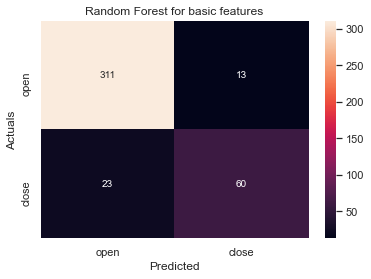

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cm = pd.DataFrame(confusion_matrix(test['is_closed'], rfc.predict(test.drop('is_closed', axis=1)), labels=[0, 1])) 
LABELS = ['open', 'close']
sns.heatmap(cm, annot=True, xticklabels=LABELS, yticklabels=LABELS, fmt='g').set_title("Random Forest for basic features")

xl = plt.xlabel("Predicted")
yl = plt.ylabel("Actuals")

In [84]:
Rfclf_fea = pd.DataFrame(rfc.feature_importances_)
Rfclf_fea["Feature"] = list(train.drop('is_closed', axis=1).columns) 
Rfclf_fea.sort_values(by=0, ascending=False).head()

,0,Feature
1,0.535822,rating
0,0.221658,review_count
2,0.024881,price
51,0.013628,categories_diners
140,0.012511,categories_tradamerican


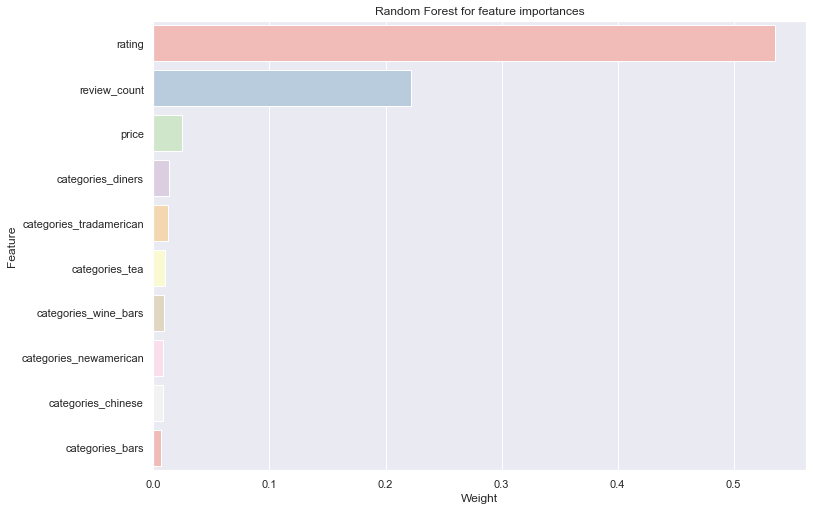

In [122]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(0,"Feature",data = Rfclf_fea.sort_values(by=0, ascending=False)[0:10],\
                palette="Pastel1",orient = "h")
g.set_xlabel("Weight")

g = g.set_title("Random Forest for feature importances")

In [97]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc,precision_recall_curve

predicted = rfc.predict(test.drop('is_closed', axis=1))
f1_score = f1_score(test['is_closed'], predicted,average='macro')

predict_p=rfc.predict_proba(test.drop('is_closed', axis=1))
y_pred = predict_p[:,1]
fpr, tpr, thresholds = roc_curve(test['is_closed'], y_pred)

print('f1 macro:', '%.4f'%f1_score)
print("AUC: {:.4}".format(auc(fpr, tpr)))


f1 macro: 0.8573
AUC: 0.9064


In [98]:
from sklearn.model_selection import cross_validate
from matplotlib import pyplot as plt

def k_fold(train, label):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    metrics = ["f1_macro"]
    lst=[]
    for k in range(2,20):
        cv = cross_validate(clf, train, label, scoring=metrics, cv=k)
        v=np.mean(cv['test_f1_macro'])
        lst.append(v)
    k=list(range(2,20))    
    plt.figure(figsize=(8,4))
    plt.plot(k,lst)
    plt.title('F1 Macro vs. K-Fold')
    plt.xlabel('K-Fold')
    plt.ylabel('F1 Macro')
    plt.show()
    return None

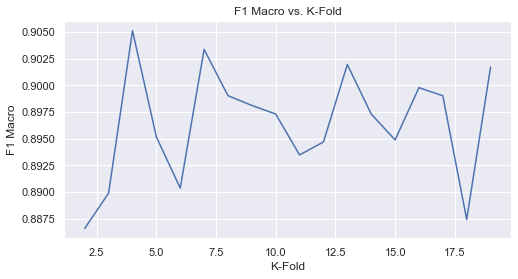

In [99]:
k_fold(train.drop('is_closed', axis=1), train['is_closed'])

In [113]:
#cv scores
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rfc, train.drop('is_closed', axis=1), train['is_closed'], cv=4,scoring='f1_macro')
cv_mean_score = np.mean(cv_scores)

print('test f1_macro:',cv_mean_score )

test f1_macro: 0.9051035545054691
